# MULTIPLE LINEAR REGRESSION & POLYNOMIAL REGRESSION

# SAMPLE DATASET

## TRAINING DATASET

In [3]:
import pandas as pd

pizza = {
         'diameter' : [6, 8, 10, 14, 18],
         'n_toping' : [2, 1, 0, 2, 0],
         'harga'    : [7, 9, 13, 17.5, 18]
        }

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_toping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


## TESTING DATASET

In [4]:
pizza = {
         'diameter' : [8, 9, 11, 16, 12],
         'n_toping' : [2, 0, 2, 2, 0],
         'harga'    : [10, 9.5, 17, 18, 14]
        }

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_toping,harga
0,8,2,10.0
1,9,0,9.5
2,11,2,17.0
3,16,2,18.0
4,12,0,14.0


# PREPROCESSING DATA

In [13]:
import numpy as np

X_train = np.array(train_pizza_df[['diameter', 'n_toping']])
y_train = np.array(train_pizza_df['harga'])

print(f'X_train = \n{X_train}')
print(f'y_train = {y_train}')

X_train = 
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]
y_train = [ 7.   9.  13.  17.5 18. ]


In [14]:
X_test = np.array(test_pizza_df[['diameter', 'n_toping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test = \n{X_test}')
print(f'y_test = {y_test}')

X_test = 
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]
y_test = [10.   9.5 17.  18.  14. ]


# MULTIPLE LINEAR REGRESSION

Multiple Linear Regression merupakan bentuk general dari linear regression dimana pada pada multiple ini memiliki lebih dari satu explanatory variable

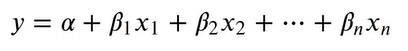

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.7308064064784359


# POLYNOMIAL REGRESSION

Polynomial Regression merupakan pemodelan machine learning yang memodelkan hubungan antara independent variable (x) yang berorde 2 atau lebih dengan dependent variable y.

# PREPROCESSING DATASET

In [18]:
X_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train = \n{X_train}')
print(f'y_train = {y_train}')

X_train = 
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]
y_train = [ 7.   9.  13.  17.5 18. ]


# POLYNOMIAL REGRESSION: QUADRATIC

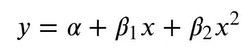

## POLYNOMIAL FEATURES

In [20]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree = 2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic: \n{X_train_quadratic}')

X_train_quadratic: 
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


## TRAINING MODEL

In [21]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

## VISUALISASI MODEL

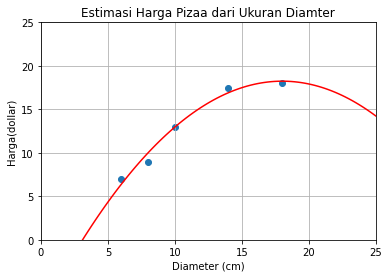

In [25]:
import matplotlib.pyplot as plt

X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.fit_transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.xlabel('Diameter (cm)')
plt.ylabel('Harga(dollar)')
plt.title('Estimasi Harga Pizaa dari Ukuran Diamter')
plt.grid(True)
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.show()

## POLYNOMIAL REGRESSION: QUADRATIC vs CUBIC

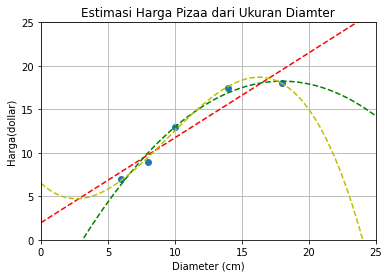

In [28]:
# Training Set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label = 'Linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree = 2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.fit_transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis_quadratic, '--g', label = 'Quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree = 3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.fit_transform(X_vis)
y_vis_cubic = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis_cubic, '--y', label = 'Cubic')

plt.xlabel('Diameter (cm)')
plt.ylabel('Harga(dollar)')
plt.title('Estimasi Harga Pizaa dari Ukuran Diamter')
plt.grid(True)
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.show()